<a href="https://colab.research.google.com/github/vkjadon/sklearn/blob/main/Ex2Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualize Concrete Strength

Concrete strength is affected by factors such as water to cement ratio, raw material quality, the ratio of coarse or fine aggregate, concrete age, concrete compaction, temperature, relative humidity, and other factors during the curing of the concrete. The data includes the following information for 1030 concrete samples.

- **Input variables:**
  - Cement: kg/m$^3$ mixture
  - Blast Furnace Slag: kg/m$^3$ mixture
  - Fly Ash: kg/m$^3$ mixture
  - Water: kg/m$^3$ mixture
  - Superplasticizer: kg/m$^3$ mixture
  - Coarse Aggregate: kg/m$^3$ mixture
  - Fine Aggregate: kg/m$^3$ mixture
  - Age: Day (1~365)
- **Output variable:**
  - Concrete compressive strength: MPa

In [33]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
!pwd

/content


In [7]:
!ls

drive  sample_data


In [52]:
# Import data and display first 20 rows
raw_df = pd.read_csv('sample_data/concrete_data.csv')
raw_df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


# 1-D plots
1-dimensional plots are useful for plotting distributions of a single feature. It enables quick observations to see if the data is clean or if it needs some preprocessing. There are many ways to visualize the distribution, several of which are shown below:

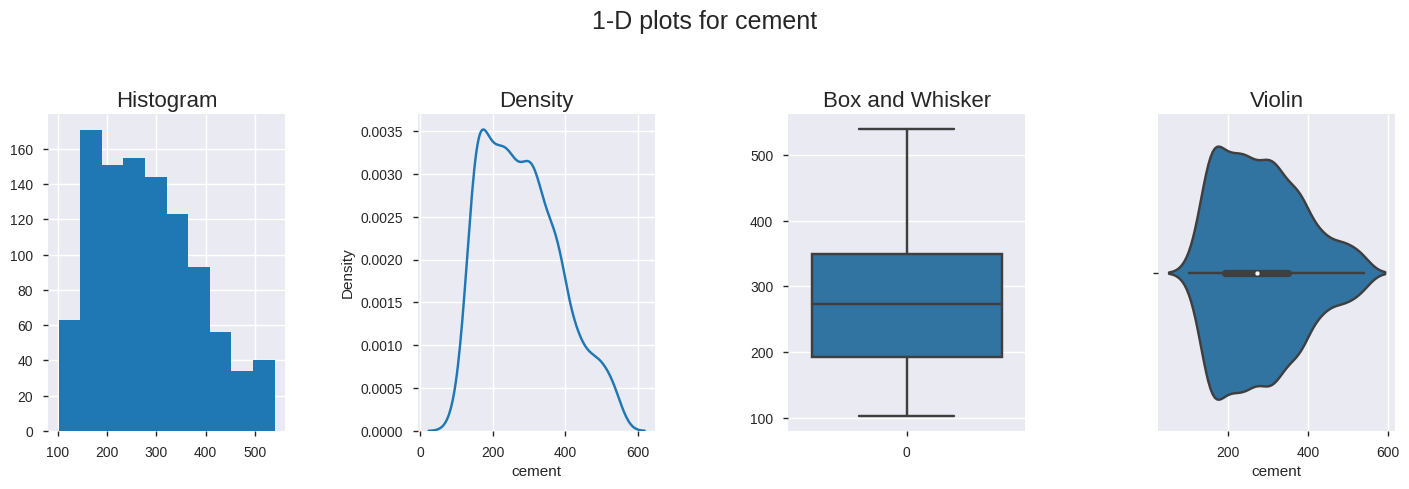

In [53]:
col = 'cement'

plt.figure(figsize=(15,5))
plt.suptitle('1-D plots for %s' %col,size=18,y=1.05)

plt.subplot(141)
plt.hist(raw_df[col])
plt.title('Histogram',size=16)

plt.subplot(142)
sns.kdeplot(data = raw_df[col])
plt.title('Density',size=16)

plt.subplot(143)
sns.boxplot(data = raw_df[col])
plt.title('Box and Whisker',size=16)

plt.subplot(144)
sns.violinplot(x = raw_df[col])
plt.title('Violin',size=16)
plt.tight_layout(pad=4)


# 2-D plots
2-dimensional plots are particularly useful to show correlations between two features. This could be useful to give you an idea of important features to predict an output with a machine learning model. 

- **Line plots:** shows time series; since there is no time element in this dataset, this will not be shown here. To create a line plot, use plt.plot(data)
- **Scatter plots:** shows correlations between two features. Consider log scales for data that spans several orders of magnitude
- **Pairplots and jointplots:** seaborn plots that show both the distribution and correlations
- **Heatmap:** compute correlations between features using Pandas df.corr(). Highly correlated features are often redundant and slow down the analysis without improving results
- **Grouped 1-D plots:** distributions of a single column of data that are grouped based on an independent feature

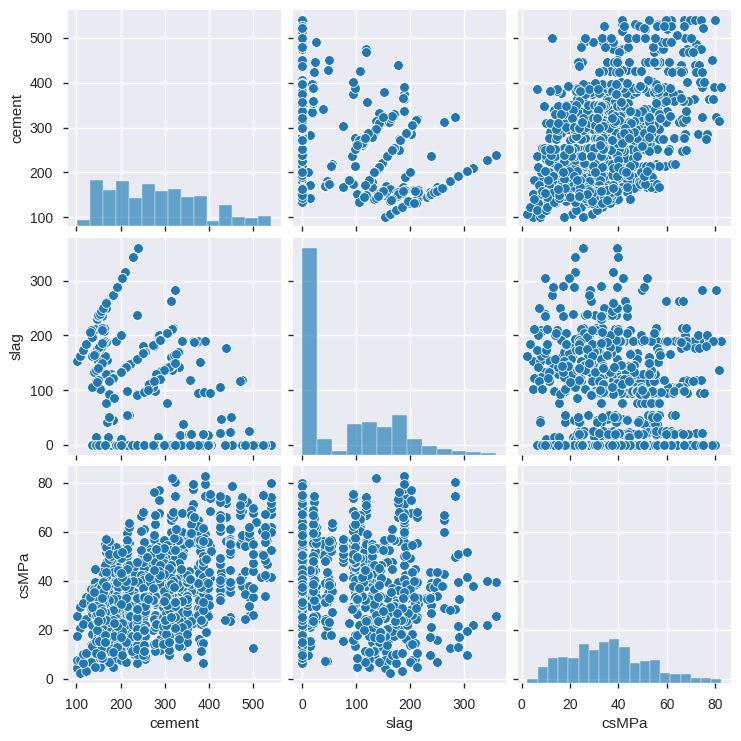

In [54]:
# Pairplot
sns.pairplot(raw_df[['cement','slag','csMPa']])

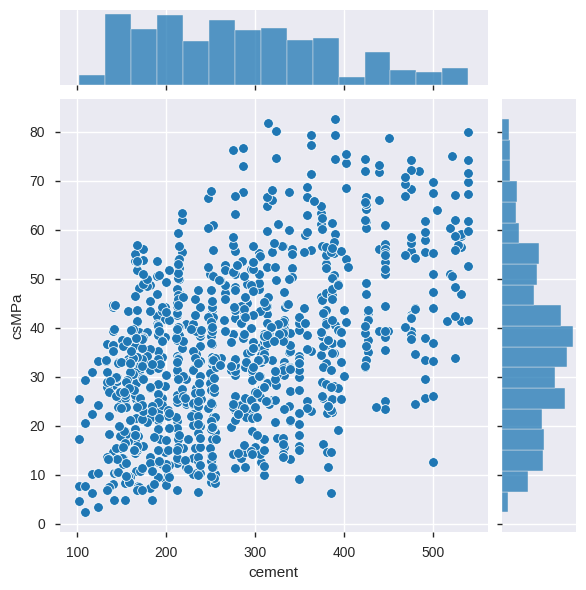

In [55]:
# Jointplot
sns.jointplot(x=raw_df['cement'],y=raw_df['csMPa'])

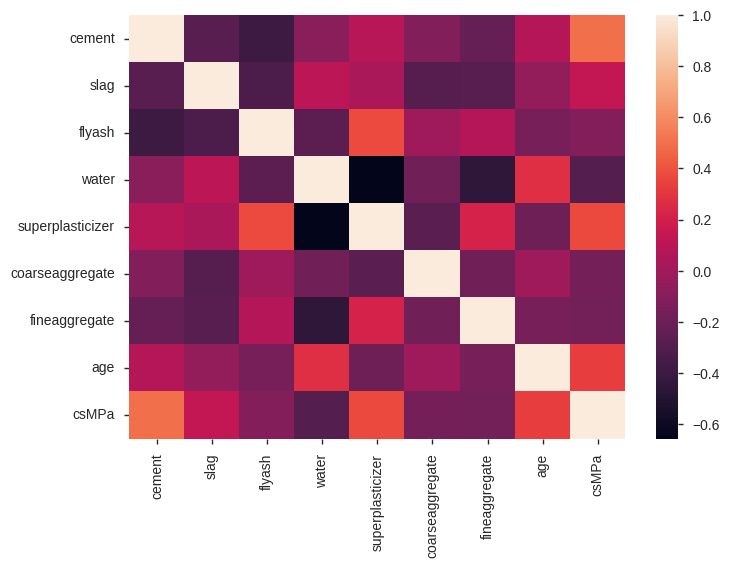

In [56]:
# Heatmap showing the correlation between features
# 1.0 means exactly correlated, -1.0 means exactly inversely correlated, and 0.0 means no correlation
sns.heatmap(raw_df.corr())

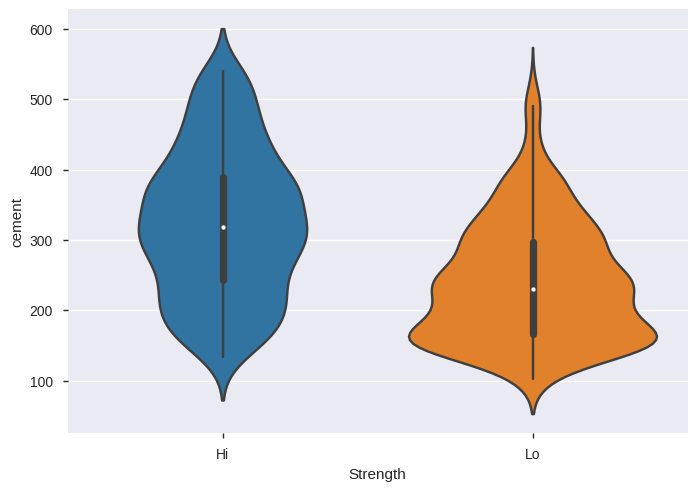

In [57]:
# Grouped 1-D plot
# Group 'cement' based on csMPa > 35.0 or not
raw_df['Strength'] = np.where(raw_df['csMPa'] > 35.0,'Hi','Lo')
sns.violinplot(x = raw_df['Strength'],y = raw_df['cement'])

**Activity** Generate 2 types of 2-dimensional plots using 2 features of your choice (csMPa would be a useful feature to include, since that is the output feature you want to predict with regression)

# Multi-dimensional plots
Multidimensional plots visualize more complex relationships. However, natural intuition begins to break down as more dimensions are introduced, so be careful when introducing too many features in a single plot. 

- 3-D scatter plots show correlations between 3 features. However, visualizing the 3-D plot on a 2-D screen can present challenges. See the "Other plotting options" section for alternatives
- Grouping methods can continue to show more features on a 2-D plot by adjusting the color, size, or shape of the marker; be sure to include a legend
- Principal Component Analysis (PCA) reduces dozens of features by tranforming to a lower dimensional space. The principal component directions and magnitudes are computed using the PCA function from scikit-learn. 

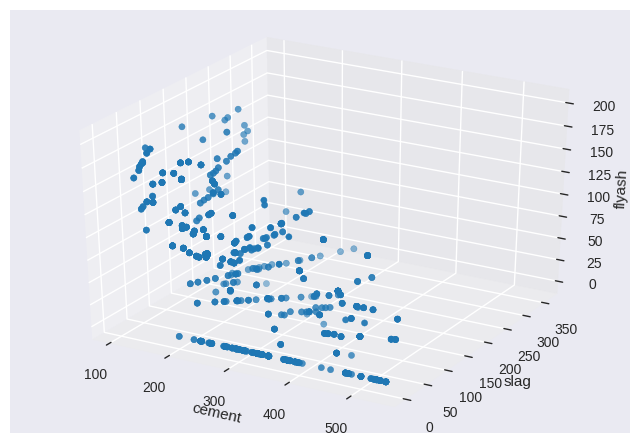

In [58]:
# 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = raw_df['cement']
y = raw_df['slag']
z = raw_df['flyash']

ax.set_xlabel('cement')
ax.set_ylabel('slag')
ax.set_zlabel('flyash')

ax.scatter(x, y, z)

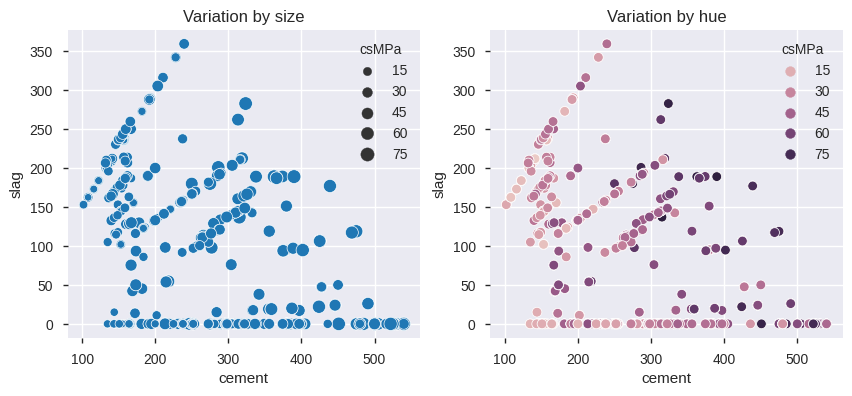

In [59]:
# Grouping method: show 'cement' and 'slag' as primary correlation,
#  with csMPa as the variation in marker
x = raw_df['cement']
y = raw_df['slag']
z = raw_df['csMPa']

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.scatterplot(x = x,y = y,size=z)
plt.title('Variation by size')

plt.subplot(122)
sns.scatterplot(x = x,y = y,hue=z)
plt.title('Variation by hue')
plt.show()

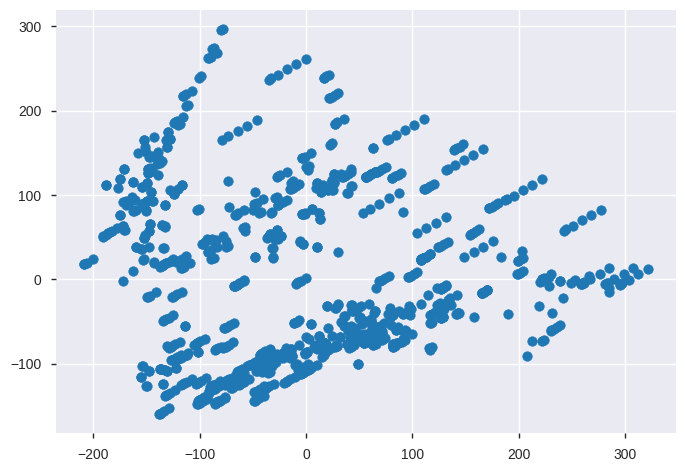

In [60]:
# PCA
pca = PCA(n_components=2)
pca_data = raw_df[raw_df.columns[:-2]].values
principal_components = pca.fit_transform(pca_data)

x = principal_components[:,0]
y = principal_components[:,1]
plt.scatter(x,y)
plt.show()